In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:

X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history=model.fit(X_train_scaled,y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5963 - loss: 0.6696 - val_accuracy: 0.8019 - val_loss: 0.4664
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4523 - val_accuracy: 0.8112 - val_loss: 0.4357
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4412 - val_accuracy: 0.8219 - val_loss: 0.4166
Epoch 4/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8274 - loss: 0.4110 - val_accuracy: 0.8281 - val_loss: 0.3985
Epoch 5/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.3957 - val_accuracy: 0.8406 - val_loss: 0.3824
Epoch 6/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3724 - val_accuracy: 0.8450 - val_loss: 0.3698
Epoch 7/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3726 - val_accuracy: 0.8487 - val_loss: 0.3604
Epoch 8/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.3655 - 

In [23]:
model.layers[0].get_weights()

[array([[ 0.23636045, -0.2775064 ,  0.00945652, -0.35777536,  0.15908363,
         -0.19367099, -0.13433214,  0.45481187, -0.89025575,  0.01484325,
         -0.19940567],
        [ 1.2708862 ,  1.771222  ,  1.4259613 ,  0.02386192, -0.08667872,
         -0.74041456, -0.59312445,  0.73582906, -0.7915377 , -1.4484777 ,
          1.4195534 ],
        [-0.7261361 , -0.14045642,  0.02474494, -0.5113763 , -0.26713374,
         -0.9331739 , -0.5129189 ,  0.07338797,  0.7998261 , -0.31011415,
          0.08812306],
        [-1.2391372 , -0.5851741 , -0.18609987,  1.2278347 , -0.07634509,
          0.1290552 , -0.4019323 ,  0.41563103, -0.5141717 ,  1.4922143 ,
         -0.42920217],
        [ 0.00997037, -0.05828807, -1.2118627 ,  1.1785572 ,  1.5386757 ,
         -0.6348854 , -0.46500367,  0.08620933, -0.22305375, -0.42897657,
          0.6712589 ],
        [ 0.66123456,  0.14421327, -0.09072747,  0.14416136,  0.7281092 ,
          0.68822885, -0.27274203,  0.04309281,  0.18161939,  0.2033405

In [24]:
model.layers[1].get_weights()

[array([[ 7.5831711e-01,  6.2632084e-01, -1.3120029e+00, -4.2216533e-01,
         -5.0631285e-01,  3.8812637e-02, -3.4841299e-01,  6.7071599e-01,
          2.2570431e-01,  6.8217230e-01,  7.1464926e-01],
        [ 7.0551589e-02, -5.5655811e-02,  8.1337440e-01,  2.3534077e-01,
         -6.2848404e-02, -4.3077517e-01, -6.6457362e+00, -1.3811953e+00,
         -3.1228021e-01, -1.3939564e+00, -6.6208863e-01],
        [-6.5307504e-01, -2.2721055e-01, -2.1372221e+00, -2.2110590e-01,
          3.8283940e-03,  2.8408074e-01, -4.3789024e+00,  7.1072966e-01,
          5.6695443e-01, -2.3218210e-01, -2.9275256e-01],
        [ 1.1695843e+00, -2.1763919e-01,  6.5000939e-01, -8.3200294e-01,
         -1.1510213e-01,  2.7223387e-01,  7.5861949e-01,  4.6518335e-01,
         -4.6483096e-01,  3.6588696e-01, -9.5049596e-01],
        [ 5.8753472e-03,  1.5823148e-01,  3.5604686e-01,  8.2135051e-02,
          7.6143906e-02,  5.0984931e-01, -1.0588053e+00,  4.8492166e-01,
         -4.9252334e-01, -4.6348918e-0

In [25]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
y_log

array([[0.02737441],
       [0.0702479 ],
       [0.03660411],
       ...,
       [0.00511162],
       [0.02035197],
       [0.3911544 ]], dtype=float32)

In [27]:
y_pred=np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.851

In [29]:
import matplotlib.pyplot as plt

In [30]:
history.history

{'accuracy': [0.7200000286102295,
  0.8056250214576721,
  0.8168749809265137,
  0.8278124928474426,
  0.8343750238418579,
  0.8454687595367432,
  0.8487499952316284,
  0.8512499928474426,
  0.8526562452316284,
  0.8543750047683716,
  0.8564062714576721,
  0.8565624952316284,
  0.8587499856948853,
  0.8573437333106995,
  0.8584374785423279,
  0.8584374785423279,
  0.8592187762260437,
  0.8581249713897705,
  0.8589062690734863,
  0.8606250286102295,
  0.8576562404632568,
  0.8590624928474426,
  0.8617187738418579,
  0.8596875071525574,
  0.858593761920929,
  0.8607812523841858,
  0.8604687452316284,
  0.8595312237739563,
  0.8610937595367432,
  0.8612499833106995,
  0.8604687452316284,
  0.8643749952316284,
  0.8628125190734863,
  0.8621875047683716,
  0.8620312213897705,
  0.8631250262260437,
  0.8642187714576721,
  0.8620312213897705,
  0.8631250262260437,
  0.864062488079071,
  0.86328125,
  0.8634374737739563,
  0.8634374737739563,
  0.8626562356948853,
  0.8645312786102295,
  0.8646

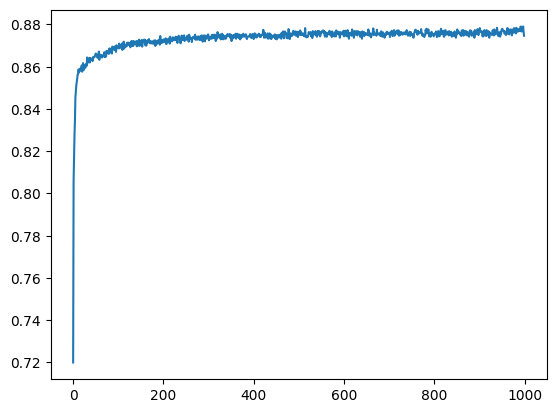

In [31]:
plt.plot(history.history['accuracy'])


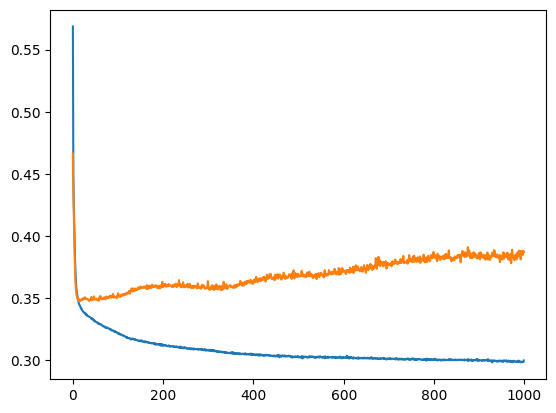

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

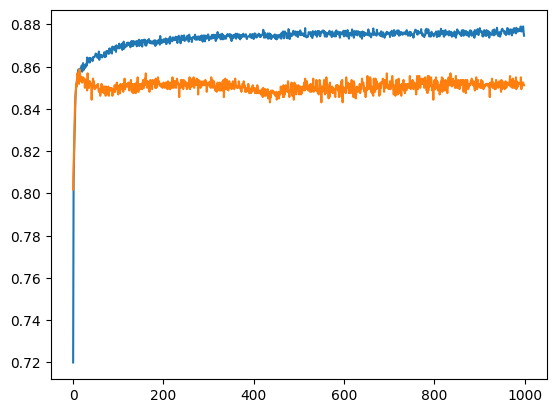

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])